In [53]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

In [55]:
filepath = "/Users/rajeshr/Desktop/Courses/Semester 2/CS671/Assignment1/Group22/Regression/BivariateData/22.csv"
data = pd.read_csv(filepath, header=None, delimiter=",")
data

,0,1,2
0,0.22,0.15,2.27500
1,0.46,0.01,4.96820
2,0.55,0.63,3.63130
3,0.47,0.04,5.01020
4,0.05,0.88,-0.71169
...,...,...,...
10196,0.66,0.45,3.15950
10197,0.45,0.42,4.12860
10198,0.03,0.26,0.57689
10199,0.01,0.72,-0.51562


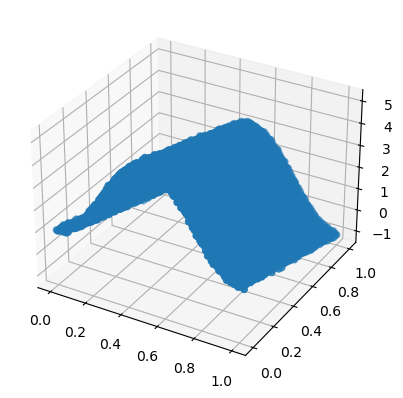

In [56]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data.iloc[:,0], data.iloc[:,1], data.iloc[:,2], cmap='Greens')
plt.show()

In [57]:
def split_data(data):
    m, n = data.shape
    l1 = int(0.6*m)
    l2 = l1 + int(0.2*m)
    training = data.iloc[:l1]
    validation = data.iloc[l1:l2]
    test = data.iloc[l2:m]
    
    return training, validation, test

In [58]:
training, validation, test = split_data(data)
training

,0,1,2
0,0.22,0.15,2.27500
1,0.46,0.01,4.96820
2,0.55,0.63,3.63130
3,0.47,0.04,5.01020
4,0.05,0.88,-0.71169
...,...,...,...
6115,0.49,0.53,3.95850
6116,0.09,0.41,0.53437
6117,0.87,0.19,1.26240
6118,0.47,0.39,4.24730


In [84]:
def linear(x):
    return x

def inst_error(y, yp):
    return sum(0.5*(y-yp)**2)

In [89]:
def train_data(xn):

    wh1 = 0.10*np.random.randn(3, 5)
    wh2 = 0.10*np.random.randn(5, 5)
    wo = 0.10*np.random.randn(5, 1)
    avg_err = []
    epoch = 100
    
    while(epoch):
    
        err = []
        
        for i in range(len(xn)):
            
            y = xn.iat[i, 2]

            xi = [1, xn.iat[i,0], xn.iat[i,1]] #Input layer
            #--------------------------
            h1 = np.dot(wh1.T, xi) #hidden layer 1 out
            a1 = linear(h1) #hidden layer 1 activation out
            #--------------------------
            h2 = np.dot(wh2.T, a1) #hidden layer 2 out
            a2 = linear(h2) #hidden layer 2 activation out
            #--------------------------
            out = np.dot(wo.T, a2) #Output layer out
            ao = linear(out) #Output activation 
            #--------------------------
               
            en = inst_error(y, ao)
            err.append(en)
            neta = 0.01
            
            #Update weights
            wo = wo + (neta * np.outer(a2, (y-ao)))
                        
            var1 = np.dot(wo, (y-ao))
            var2 = 1
            wh2 = wh2 + (neta * np.outer(a1, var1*var2))
            
            var3 = var1*var2
            var4 = np.dot(wh2, var3)
            var5 = 1
            wh1 = wh1 + (neta * np.outer(xi, var4*var5))

            
        avg_error = sum(err)/len(err)
        avg_err.append(avg_error)
        if epoch%10==0:
            print("ERROR: ",avg_error)
        epoch -= 1
    
    return wh1, wh2, wo, avg_err, a1, a2, ao

wh1, wh2, wo, avg_err, a1, a2, ao = train_data(training)

ERROR:  nan
ERROR:  nan
ERROR:  nan
ERROR:  nan
ERROR:  nan
ERROR:  nan
ERROR:  nan
ERROR:  nan
ERROR:  nan
ERROR:  nan


In [74]:
def test_data(wh1, wh2, wo, xn):
    pred_out = []
    for i in range(len(xn)):
        
        xi = [1, xn.iat[i,0], xn.iat[i,1]]
        
        h1 = np.dot(wh1.T, xi)
        a1 = sigmoid(h1)
        
        h2 = np.dot(wh2.T, a1)
        a2 = sigmoid(h2)

        out = np.dot(wo.T, a2) 
        ao = sigmoid(out) 
        
        pred_out.append(ao)
        
    return np.round(np.array(pred_out))

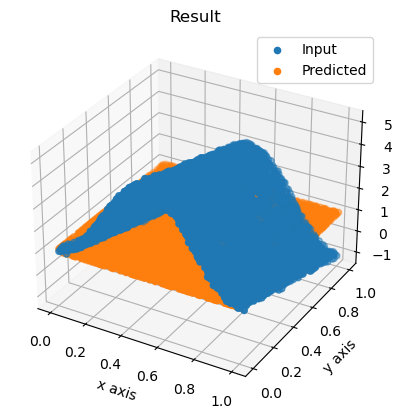

In [82]:
y = test_data(wh1, wh2, wo, training)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(training.iloc[:,0], training.iloc[:,1], training.iloc[:,2], cmap='Greens')
ax.scatter3D(training.iloc[:,0], training.iloc[:,1], y, cmap='Greens')
plt.title("Result")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend(["Input", "Predicted"])
plt.savefig("/Users/rajeshr/Desktop/"+str(np.random.randint(1, 100000))+".png")
plt.show()